In [1]:
import os  # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys  # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path  # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [2]:
from setup_module.imports import *  # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from estimators_get_pipe import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


Using MPS


0it [00:00, ?it/s]

Using MPS


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

### Set variables

In [3]:
# Variables
method = 'Transformers'
with open(f'{data_dir}{method}_results_save_path.txt', 'r') as f:
    results_save_path = f.read()
with open(f'{data_dir}{method}_done_xy_save_path.txt', 'r') as f:
    done_xy_save_path = f.read()

t = time.time()
n_jobs = -1
n_splits = 10
n_repeats = 3
random_state = 42
refit = True
class_weight = 'balanced'
cv = RepeatedStratifiedKFold(
    n_splits=n_splits, n_repeats=n_repeats, random_state=random_state
)
scoring = 'recall'
scores = [
    'recall', 'accuracy', 'f1', 'roc_auc',
    'explained_variance', 'matthews_corrcoef'
]
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
}
analysis_columns = ['Warmth', 'Competence']
text_col = 'Job Description spacy_sentencized'
metrics_dict = {
    'Mean Cross Validation Train Score': np.nan,
    f'Mean Cross Validation Train - {scoring.title()}': np.nan,
    f'Mean Explained Train Variance - {scoring.title()}': np.nan,
    'Mean Cross Validation Test Score': np.nan,
    f'Mean Cross Validation Test - {scoring.title()}': np.nan,
    f'Mean Explained Test Variance - {scoring.title()}': np.nan,
    'Explained Variance': np.nan,
    'Accuracy': np.nan,
    'Balanced Accuracy': np.nan,
    'Precision': np.nan,
    'Recall': np.nan,
    'F1-score': np.nan,
    'Matthews Correlation Coefficient': np.nan,
    'Fowlkes–Mallows Index': np.nan,
    'R2 Score': np.nan,
    'ROC': np.nan,
    'AUC': np.nan,
    f'{scoring.title()} Best Threshold': np.nan,
    f'{scoring.title()} Best Score': np.nan,
    'Log Loss/Cross Entropy': np.nan,
    'Cohen’s Kappa': np.nan,
    'Geometric Mean': np.nan,
    'Classification Report': np.nan,
    'Imbalanced Classification Report': np.nan,
    'Confusion Matrix': np.nan,
    'Normalized Confusion Matrix': np.nan
}

# Set random seed
random.seed(random_state)
np.random.seed(random_state)
torch.manual_seed(random_state)
cores = multiprocessing.cpu_count()

# Transformer variables
max_length = 512
returned_tensor = 'pt'
cpu_counts = torch.multiprocessing.cpu_count()
device = torch.device('mps') if torch.has_mps and torch.backends.mps.is_built() and torch.backends.mps.is_available(
) else torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device_name = str(device.type)
print(f'Using {device_name.upper()}')
# Set random seed
random_state = 42
random.seed(random_state)
np.random.seed(random_state)
torch.manual_seed(random_state)
cores = multiprocessing.cpu_count()
torch.Generator(device_name).manual_seed(random_state)
cores = multiprocessing.cpu_count()
accelerator = Accelerator()
torch.autograd.set_detect_anomaly(True)
os.environ.get('TOKENIZERS_PARALLELISM')
best_trial_args = [
    'num_train_epochs', 'per_device_train_batch_size', 'per_device_eval_batch_size', 'learning_rate', 'warmup_steps', 'weight_decay'
]
training_args_dict = {
    'seed': random_state,
    'resume_from_checkpoint': True,
    'overwrite_output_dir': True,
    'logging_steps': 500,
    'evaluation_strategy': 'steps',
    'eval_steps': 500,
    'save_strategy': 'steps',
    'save_steps': 500,
    # 'metric_for_best_model': 'recall',
    # 'torch_compile': bool(transformers.file_utils.is_torch_available()),
    'use_mps_device': bool(device_name == 'mps' and torch.backends.mps.is_available()),
    'optim': 'adamw_torch',
    'load_best_model_at_end': True,
    # The below metrics are used by hyperparameter search
    'num_train_epochs': 3,
    'per_device_train_batch_size': 16,
    'per_device_eval_batch_size': 20,
    'learning_rate': 5e-5,
    'warmup_steps': 100,
    'weight_decay': 0.01,
}
training_args_dict_for_best_trial = {
    arg_name: arg_
    for arg_name, arg_ in training_args_dict.items()
    if arg_name not in best_trial_args
}

# Plotting variables
pp = pprint.PrettyPrinter(indent=4)
tqdm.tqdm.pandas(desc='progress-bar')
tqdm_auto.tqdm.pandas(desc='progress-bar')
# tqdm.notebook.tqdm().pandas(desc='progress-bar')
tqdm_auto.notebook_tqdm().pandas(desc='progress-bar')
# pbar = progressbar.ProgressBar(maxval=10)
mpl.style.use(f'{code_dir}/setup_module/apa.mplstyle-main/apa.mplstyle')
mpl.rcParams['text.usetex'] = False
font = {'family': 'arial', 'weight': 'normal', 'size': 10}
mpl.rc('font', **font)
plt.style.use('tableau-colorblind10')
plt.set_cmap('Blues')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 5000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', '{:.2f}'.format)


Using MPS


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

# Functions


In [4]:
def show_and_close_plots():
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()


In [5]:
def close_plots():
    plt.clf()
    plt.cla()
    plt.close()


In [6]:
def make_df_metrics(
    vectorizers_pipe, classifiers_pipe, transformers_pipe, metrics_list,
    col, vectorizer_name, classifier_name, protocol=None,
    analysis_columns=analysis_columns,
    table_save_path=table_save_path,
    method=method, save_name=None,
    compression=None, path_suffix=None, 
):
    if save_name is None:
        save_name = 'Transformer Estimators Table'
    if compression is None:
        compression = False
    if protocol is None:
        protocol = pickle.HIGHEST_PROTOCOL
    if isinstance(metrics_list, dict):
        metrics_list = list(metrics_list.keys())

    transformers_tokenizers_list = [
        str(tranformer_dict['tokenizer']).split('.')[-1].split("'>")[0]
        for tranformer_dict in transformers_pipe.values()
    ]
    combined_classifiers_list = list(classifiers_pipe.keys()) + list(transformers_pipe.keys())
    combined_vectorizers_list = list(vectorizers_pipe.keys()) + transformers_tokenizers_list

    print('='*20)
    if os.path.exists(f'{table_save_path}{save_name}') and os.path.getsize(f'{table_save_path}{save_name}') > 0:
        print(f'Loading table from {table_save_path}{save_name}')
        df_metrics = pd.read_pickle(f'{table_save_path}{save_name}')
        print('Done loading table!')
    else:
        print('Table does not exist, creating new table...')
        index = pd.MultiIndex.from_product(
            [list(map(lambda classifier_name: classifier_name, list(transformers_pipe.keys())))],
            names=['Classifiers'],
        )
        columns = pd.MultiIndex.from_product(
            [
                analysis_columns,
                metrics_list,
            ],
            names=['Variable', 'Measures'],
        )
        df_metrics = pd.DataFrame(index=index, columns=columns)
        print('Done creating new table!')
    print('='*20)

    return df_metrics


In [7]:
def get_existing_files(
    results_save_path=results_save_path,
    estimator_names_list=None,
):
    if estimator_names_list is None:
        estimator_names_list = []

    print(f'Searching for existing estimators in directory:\n{results_save_path}')

    for estimators_file in tqdm.tqdm(glob.glob(f'{results_save_path}*.*')):
        if f'{method} Estimator - ' in estimators_file:

            col=estimators_file.split(f'{method} Estimator - ')[-1].split(' - ')[0]
            vectorizer_name=estimators_file.split(f'{col} - ')[-1].split(' + ')[0]
            classifier_name=estimators_file.split(f'{vectorizer_name} + ')[-1].split(' (Save_protocol=')[0]

            estimator_names_list.append(f'{col} - {vectorizer_name} + {classifier_name}')

    return (
        list(set(estimator_names_list))
    )


In [8]:
def load_Xy_estimator(
    model, tokenizer, config,
    col, vectorizer_name, classifier_name, protocol,
    results_save_path=results_save_path,
    done_xy_save_path=done_xy_save_path, method=method,
    compression=None, saved_files_list=None,
    path_suffix=None, data_dict=None,
):
    if compression is None:
        compression = False
    if protocol is None:
        protocol = pickle.HIGHEST_PROTOCOL
    if path_suffix is None:
        path_suffix = f' - {str(col)} - {vectorizer_name} + {classifier_name} (Save_protocol={protocol}).pkl'
    if data_dict is None:
        data_dict = {}
    if saved_files_list is None:
        saved_files_list = []

    print(f'Loading Xy from previous for {col}...')
    # Read all dfs into
    for file_path in glob.glob(f'{done_xy_save_path}*{path_suffix}'):
        file_name = file_path.split(f'{done_xy_save_path}{method} ')[-1].split(path_suffix)[0]
        print(f'Loading {file_name} from {file_path}')
        if path_suffix in file_path and 'df_' in file_name or 'metrics_dict' in file_name:
            data_dict[file_name] = pd.read_pickle(file_path)
            saved_files_list.append(file_name)

    # Load estimator and accelator
    print('Loading Estimator.')
    estimator_dir = f'{results_save_path}{method} Estimator{path_suffix.replace("pkl", "model")}'
    saved_estimator = model.from_pretrained(f'{estimator_dir}/checkpoint-500')
    tokenizer = tokenizer.from_pretrained(estimator_dir)
    config = config.from_pretrained(f'{estimator_dir}/config.json')
    saved_files_list.extend(['Estimator', 'config'])#, 'accelerator'])

    # Train data
    df_train_data = data_dict['df_train_data']
    X_train = df_train_data['X_train'].values
    y_train = df_train_data['y_train'].values
    train_dataset = df_train_data['train_dataset'].values
    # Test data
    df_test_data = data_dict['df_test_data']
    X_test = df_test_data['X_test'].values
    y_test = df_test_data['y_test'].values
    test_dataset = df_test_data['test_dataset'].values
    y_test_pred = df_test_data['y_test_pred'].values
    y_test_pred_prob = df_test_data['y_test_pred_prob'].values
    # Val data
    df_val_data = data_dict['df_val_data']
    X_val = df_val_data['X_val'].values
    y_val = df_val_data['y_val'].values
    val_dataset = df_val_data['val_dataset'].values
    y_val_pred = df_val_data['y_val_pred'].values
    y_val_pred_prob = df_val_data['y_val_pred_prob'].values

    # Metrics dicts
    for key, value in data_dict.items():
        if 'metrics_dict' in key:
            for key, value in metrics_dict.items():
                if isinstance(value, str):
                    metrics_dict[key] = np.fromstring(value[1:-1], sep=' ')
    eval_metrics_dict = data_dict['eval_metrics_dict']
    test_metrics_dict = data_dict['test_metrics_dict']
    # for metrics_dict in [eval_metrics_dict, test_metrics_dict]:
    #     for key, value in metrics_dict.items():
    #         if isinstance(value, str):
    #             metrics_dict[key] = np.fromstring(value[1:-1], sep=' ')

    # Check predicted data
    check_consistent_length(X_train, y_train)
    check_consistent_length(X_test, y_test, y_test_pred, y_test_pred_prob)
    check_consistent_length(X_val, y_val, y_val_pred, y_val_pred_prob)

    # Get class weights
    (
        train_class_weights, train_class_weights_ratio, train_class_weights_dict,
        test_class_weights, test_class_weights_ratio, test_class_weights_dict,
        val_class_weights, val_class_weights_ratio, val_class_weights_dict,
    ) = get_class_weights(
        X_train, y_train,
        X_test, y_test,
        X_val, y_val,
    )

    assert set(list(data_dict.keys())+['Estimator', 'config']) == set(saved_files_list), f'Not all files were loaded! Missing: {set(data_dict.keys()) ^ set(saved_files_list)}'
    print(f'Done loading Xy and estimator!\n{list(data_dict.keys())}')
    print('='*20)

    return (
        X_train, y_train, train_dataset,
        X_test, y_test, test_dataset, y_test_pred, y_test_pred_prob,
        X_val, y_val, val_dataset, y_val_pred, y_val_pred_prob,
        train_class_weights, train_class_weights_ratio, train_class_weights_dict,
        test_class_weights_dict, test_class_weights_ratio, test_class_weights_dict,
        saved_estimator, tokenizer, config, eval_metrics_dict, test_metrics_dict,
    )


In [9]:
def get_class_weights(
    X_train, y_train,
    X_test, y_test,
    X_val, y_val,
):
    # Get train class weights
    train_class_weights = compute_class_weight(class_weight = class_weight, classes = np.unique(y_train), y = y_train)
    train_class_weights_ratio = train_class_weights[0]/train_class_weights[1]
    train_class_weights_dict = dict(zip(np.unique(y_train), train_class_weights))

    # Get train class weights
    test_class_weights = compute_class_weight(class_weight = class_weight, classes = np.unique(y_train), y = y_test)
    test_class_weights_ratio = test_class_weights[0]/test_class_weights[1]
    test_class_weights_dict = dict(zip(np.unique(y_test), test_class_weights))

    # Get val class weights
    val_class_weights = compute_class_weight(class_weight = class_weight, classes = np.unique(y_train), y = y_val)
    val_class_weights_ratio = val_class_weights[0]/val_class_weights[1]
    val_class_weights_dict = dict(zip(np.unique(y_val), val_class_weights))

    return (
        train_class_weights, train_class_weights_ratio, train_class_weights_dict,
        test_class_weights, test_class_weights_ratio, test_class_weights_dict,
        val_class_weights, val_class_weights_ratio, val_class_weights_dict,
    )


In [10]:
def print_Xy(
    X_train, y_train,
    X_test, y_test,
    X_val, y_val,
    train_class_weights, train_class_weights_ratio, train_class_weights_dict,
    test_class_weights, test_class_weights_ratio, test_class_weights_dict,
    val_class_weights, val_class_weights_ratio, val_class_weights_dict,
):
    # Check for consistent length
    check_consistent_length(X_train, y_train)
    check_consistent_length(X_test, y_test)
    check_consistent_length(X_val, y_val)

    print('Done splitting data into training and testing sets.')
    print('='*20)
    print(f'Training set shape: {y_train.shape}')
    print('-'*10)
    print(f'Training set example:\n{X_train[0]}')
    print('~'*10)
    print(f'Testing set shape: {y_test.shape}')
    print('-'*10)
    print(f'Testing set example:\n{X_test[0]}')
    print('~'*10)
    print(f'Validation set shape: {y_val.shape}')
    print('-'*10)
    print(f'Validation set example:\n{X_val[0]}')
    print('~'*10)
    print(f'Training data class weights:\nRatio = {train_class_weights_ratio:.2f} (0 = {train_class_weights[0]:.2f}, 1 = {train_class_weights[1]:.2f})')
    print('-'*10)
    print(f'Testing data class weights:\nRatio = {test_class_weights_ratio:.2f} (0 = {test_class_weights[0]:.2f}, 1 = {test_class_weights[1]:.2f})')
    print('-'*10)
    print(f'Validation data class weights:\nRatio = {val_class_weights_ratio:.2f} (0 = {val_class_weights[0]:.2f}, 1 = {val_class_weights[1]:.2f})')
    print('='*20)


In [11]:
class ToDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx], device=device).clone().detach() for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], device=device).clone().detach()
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])


In [12]:
def print_Xy_encodings(
    X_train, y_train, train_dataset,
    X_test, y_test, test_dataset,
    X_val, y_val, val_dataset,
):
    # Check for consistent length
    check_consistent_length(X_train, y_train, train_dataset)
    check_consistent_length(X_test, y_test, test_dataset)
    check_consistent_length(X_val, y_val, val_dataset)

    # Check encodings
    assert all(y_train == train_dataset.encoded), 'y_train and train_dataset encoded are not the same'
    assert all(y_test == test_dataset.encoded), 'y_test and test_dataset encoded are not the same'

    print('Done encoding training, testing, and validation sets.')
    print('='*20)
    print(f'Training set encodings example:\n{" ".join(train_dataset.encodings[0].tokens[:30])}')
    print('-'*10)
    print(f'Training set encoded example: {set(train_dataset.encoded)}')
    print('~'*10)
    print(f'Testing set encodings example:\n{" ".join(test_dataset.encodings[0].tokens[:30])}')
    print('-'*10)
    print(f'Testing set encoded example: {set(test_dataset.encoded)}')
    print('~'*10)
    print(f'Validation set encodings example:\n{" ".join(val_dataset.encodings[0].tokens[:30])}')
    print('-'*10)
    print(f'Validation labels after encoding: {set(val_dataset.encoded)}')
    print('='*20)


In [13]:
def encode_data(
    X_train, y_train,
    X_test, y_test,
    X_val, y_val,
    tokenizer,
):
    print('='*20)
    print(f'Encoding training, testing, and validation sets with {tokenizer.__class__.__name__}.from_pretrained using {tokenizer.name_or_path}.')

    X_train_encodings = tokenizer(
        X_train.tolist(), truncation=True, padding=True, max_length=max_length, return_tensors=returned_tensor
    ).to(device)
    train_dataset = ToDataset(X_train_encodings, y_train)

    X_test_encodings = tokenizer(
        X_test.tolist(), truncation=True, padding=True, max_length=max_length, return_tensors=returned_tensor
    ).to(device)
    test_dataset = ToDataset(X_test_encodings, y_test)

    X_val_encodings = tokenizer(
        X_val.tolist(), truncation=True, padding=True, max_length=max_length, return_tensors=returned_tensor
    ).to(device)
    val_dataset = ToDataset(X_val_encodings, y_val)

    # Print info
    print_Xy_encodings(
        X_train, y_train, train_dataset,
        X_test, y_test, test_dataset,
        X_val, y_val, val_dataset,
    )

    return (
        X_train_encodings, train_dataset,
        X_test_encodings, test_dataset,
        X_val_encodings, val_dataset,
    )


In [14]:
def compute_metrics_with_y_pred(
    y_labels, y_pred,
    pos_label=None, labels=None, zero_division=None, alpha=None
):
    if pos_label is None:
        pos_label = 1
    if labels is None:
        labels = np.unique(y_pred)
    if zero_division is None:
        zero_division = 0
    if alpha is None:
        alpha = 0.1

    print('Computing metrics using y_pred.')
    # Using y_pred
    explained_variance = metrics.explained_variance_score(y_labels, y_pred)
    accuracy = metrics.accuracy_score(y_labels, y_pred)
    balanced_accuracy = metrics.balanced_accuracy_score(y_labels, y_pred)
    precision = metrics.precision_score(y_labels, y_pred, pos_label=pos_label, labels=labels, zero_division=zero_division)
    recall = metrics.recall_score(y_labels, y_pred, pos_label=pos_label, labels=labels, zero_division=zero_division)
    f1 = metrics.f1_score(y_labels, y_pred, pos_label=pos_label,labels=labels, zero_division=zero_division)
    mcc = metrics.matthews_corrcoef(y_labels, y_pred)
    fm = metrics.fowlkes_mallows_score(y_labels, y_pred)
    r2 = metrics.r2_score(y_labels, y_pred)
    kappa = metrics.cohen_kappa_score(y_labels, y_pred, labels=labels)
    gmean_iba = imblearn.metrics.make_index_balanced_accuracy(alpha=alpha, squared=True)(geometric_mean_score)
    gmean = gmean_iba(y_labels, y_pred)
    report = metrics.classification_report(y_labels, y_pred, labels=labels, zero_division=zero_division)
    imblearn_report = classification_report_imbalanced(y_labels, y_pred, labels=labels, zero_division=zero_division)
    cm = metrics.confusion_matrix(y_labels, y_pred, labels=labels)
    cm_normalized = metrics.confusion_matrix(y_labels, y_pred, normalize='true', labels=labels)

    return (
        explained_variance, accuracy, balanced_accuracy, precision,
        recall, f1, mcc, fm, r2, kappa, gmean, report, imblearn_report, cm, cm_normalized
    )


In [15]:
def plot_metrics_with_y_pred(
    y_labels, y_pred, col, vectorizer_name, classifier_name,
    pos_label=None, labels=None
):
    if pos_label is None:
        pos_label = 1
    if labels is None:
        labels = np.unique(y_pred)

    # Displays
    close_plots()
    cm_curve = metrics.ConfusionMatrixDisplay.from_predictions(
        y_labels, y_pred, display_labels=labels, cmap=plt.cm.Blues
    )
    cm_normalized_curve = metrics.ConfusionMatrixDisplay.from_predictions(
        y_labels, y_pred, normalize='true', display_labels=labels, cmap=plt.cm.Blues
    )
    roc_curve = metrics.RocCurveDisplay.from_predictions(
        y_labels, y_pred, pos_label=pos_label
    )
    pr_curve = metrics.PrecisionRecallDisplay.from_predictions(
        y_labels, y_pred, pos_label=pos_label
    )
    calibration_curve = CalibrationDisplay.from_predictions(
        y_labels, y_pred, pos_label=pos_label
    )
    show_and_close_plots()

    # Plots
    plots_dict = {
        'Confusion Matrix': cm_curve,
        'Normalized Confusion Matrix': cm_normalized_curve,
        'ROC Curve': roc_curve,
        'Precision-Recall Curve': pr_curve,
        'Calibration Curve': calibration_curve,
    }

    print('=' * 20)
    close_plots()
    print('Plotting metrics with y_pred_prob:')
    print('='*20)

    for plot_name, plot_ in plots_dict.items():
        close_plots()
        print(f'Plotting {plot_name}:')
        fig, ax = plt.subplots()
        ax.set_title(
            f'{col} - {plot_name} - {vectorizer_name} + {classifier_name}'
            )
        if plot_name == 'ROC Curve':
            ax.plot([0, 1], [0, 1], 'r--', lw=1)
        try:
            plot_.plot(ax=ax, cmap=plt.cm.Blues)
        except Exception:
            plot_.plot(ax=ax)
        print('=' * 20)
        fig = plt.gcf()
        fig.tight_layout()

        # Save Plots
        for image_save_format in ['eps', 'png', 'svg']:
            save_path = f'{plot_save_path}{method} {col} - {plot_name} - {vectorizer_name} + {classifier_name}.{image_save_format}'
            print(f'Saving {plot_name} at {save_path}')
            fig.savefig(
                save_path, format=image_save_format, dpi=3000, bbox_inches='tight'
            )
        show_and_close_plots()
        print(f'Saved {plot_name}!')
        print('=' * 20)

    with contextlib.suppress(AttributeError):
        # Visualisation with plot_metric
        bc = plot_metric.functions.BinaryClassification(y_labels, y_pred, labels=[0, 1])

        # Figures
        close_plots()
        fig = plt.figure(figsize=(15, 10))
        plt.subplot2grid((2, 6), (1, 1), colspan=2)
        bc.plot_confusion_matrix(colorbar=True)
        plt.subplot2grid((2, 6), (1, 3), colspan=2)
        bc.plot_confusion_matrix(normalize=True, colorbar=True)
        plt.subplot2grid(shape=(2, 6), loc=(0, 0), colspan=2)
        bc.plot_roc_curve()
        plt.subplot2grid((2, 6), (0, 2), colspan=2)
        bc.plot_precision_recall_curve()
        plt.subplot2grid((2, 6), (0, 4), colspan=2)
        bc.plot_class_distribution()
        bc.print_report()
        fig = plt.gcf()
        fig.tight_layout()

        # Save Plots
        for image_save_format in ['eps', 'png', 'svg']:
            save_path = f'{plot_save_path}{method} {col} - plot_metric Curves - {vectorizer_name} + {classifier_name}.{image_save_format}'
            print(f'Saving plot_metric Curves at {save_path}')
            fig.savefig(
                save_path, format=image_save_format, dpi=3000, bbox_inches='tight'
            )
        show_and_close_plots()

        # Heatmap
        print('Plotting Heatmap:')
        close_plots()
        classifications_dict = defaultdict(int)
        for _y_labels, _y_pred in zip(y_labels, y_pred):
            if _y_labels != _y_pred:
                classifications_dict[(_y_labels, _y_pred)] += 1

        dicts_to_plot = [
            {
                f'True {col} value': _y_labels,
                f'Predicted {col} value': _y_pred,
                'Number of Classifications': _count,
            }
            for (_y_labels, _y_pred), _count in classifications_dict.items()
        ]
        df_to_plot = pd.DataFrame(dicts_to_plot)
        df_wide = df_to_plot.pivot_table(
            index=f'True {col} value', 
            columns=f'Predicted {col} value', 
            values='Number of Classifications'
        )
        plt.figure(figsize=(9,7))
        sns.set(style='ticks', font_scale=1.2)
        sns.heatmap(df_wide, linewidths=1, cmap=plt.cm.Blues, annot=True)    
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.title(f'{col} Heatmap - {vectorizer_name} + {classifier_name}')
        fig = plt.gcf()
        fig.tight_layout()

        # Save Heatmap
        for image_save_format in ['eps', 'png', 'svg']:
            save_path = f'{plot_save_path}{method} {col} - Heatmap - {vectorizer_name} + {classifier_name}.{image_save_format}'
            print(f'Saving Heatmap at {save_path}')
            fig.savefig(
                save_path, format=image_save_format, dpi=3000, bbox_inches='tight'
            )
        print('Saved Heatmap!')
        show_and_close_plots()


In [16]:
def compute_metrics_with_y_pred_prob(
    y_labels, y_pred_prob,
    pos_label=None
):
    if pos_label is None:
        pos_label = 1

    print('Computing metrics using y_pred_prob.')
    average_precision = metrics.average_precision_score(y_labels, y_pred_prob)
    roc_auc = metrics.roc_auc_score(y_labels, y_pred_prob)
    fpr, tpr, threshold = metrics.roc_curve(y_labels, y_pred_prob, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    loss = metrics.log_loss(y_labels, y_pred_prob)
    precision_pr, recall_pr, threshold_pr = metrics.precision_recall_curve(y_labels, y_pred_prob, pos_label=1)

    return (
        average_precision, roc_auc, auc,
        fpr, tpr, threshold, loss,
        precision_pr, recall_pr, threshold_pr
    )


In [17]:
def compute_metrics_all(
    y_labels, y_pred, y_pred_prob
):
    # Get metrics
    print('='*20)
    # Using y_pred
    if y_pred:
        print('-'*20)
        (
            explained_variance, accuracy, balanced_accuracy, precision,
            recall, f1, mcc, fm, r2, kappa, gmean, report, imblearn_report, cm, cm_normalized
        ) = compute_metrics_with_y_pred(
            y_labels, y_pred
        )
    # Using y_pred_prob
    if y_pred_prob:
        print('-'*20)
        (
            average_precision, roc_auc, auc,
            fpr, tpr, threshold, loss,
            precision_pr, recall_pr, threshold_pr
        ) = compute_metrics_with_y_pred_prob(
            y_labels, y_pred_prob
        )

    # Place metrics into dict
    print('-'*20)
    print('Appending metrics to dict.')
    metrics_dict = {
        # f'{scoring.title()} Best Score': float(best_train_score),
        # f'{scoring.title()} Best Threshold': threshold,
        # 'Train - Mean Cross Validation Score': float(cv_train_scores),
        # f'Train - Mean Cross Validation - {scoring.title()}': float(cv_train_recall),
        # f'Train - Mean Explained Variance - {scoring.title()}': float(cv_train_explained_variance_recall),
        # 'Test - Mean Cross Validation Score': float(cv_test_scores),
        # f'Test - Mean Cross Validation - {scoring.title()}': float(cv_test_recall),
        # f'Test - Mean Explained Variance - {scoring.title()}': float(cv_test_explained_variance_recall),
        'Explained Variance': float(explained_variance),
        'Accuracy': float(accuracy),
        'Balanced Accuracy': float(balanced_accuracy),
        'Precision': float(precision),
        'Average Precision': float(average_precision),
        'Recall': float(recall),
        'F1-score': float(f1),
        'Matthews Correlation Coefficient': float(mcc),
        'Fowlkes–Mallows Index': float(fm),
        'R2 Score': float(r2),
        'ROC': float(roc_auc),
        'AUC': float(auc),
        'Log Loss/Cross Entropy': float(loss),
        'Cohen’s Kappa': float(kappa),
        'Geometric Mean': float(gmean),
        'Classification Report': report,
        'Imbalanced Classification Report': str(imblearn_report),
        'Confusion Matrix': str(cm),
        'Normalized Confusion Matrix': str(cm_normalized),
        'y_pred': y_pred,
        'y_pred_prob': y_pred_prob,
    }
    print('Done appending metrics to dict.')

    return metrics_dict


In [18]:
def clean_metrics_dict(metrics_dict, prefix_to_remove):
    for metric_name in list(metrics_dict):
        if metric_name.startswith(prefix_to_remove):
            new_metric_name = ' '.join(metric_name.split(prefix_to_remove)[-1].split('_')).strip()
        if not new_metric_name[0].isupper():
            new_metric_name = new_metric_name.title()
        if new_metric_name == 'Loss':
            metrics_dict['Log Loss/Cross Entropy'] = metrics_dict.pop(metric_name)
        else:
            metrics_dict[new_metric_name] = metrics_dict.pop(metric_name)

    return metrics_dict


In [19]:
# Function to get y_pred and y_pred_prob
def preprocess_logits_for_metrics_y_pred_prob(y_pred_logits, y_labels):

    print('-'*20)
    print(f'Preprocessing y_pred logits and labels for {col}:')
    print('-'*20)

    if isinstance(y_pred_logits, tuple):
        y_pred_logits = y_pred_logits[0]

    if not torch.is_tensor(y_pred_logits):
        y_pred_logits_tensor = torch.tensor(y_pred_logits, device=device)
    else:
        y_pred_logits_tensor = y_pred_logits.to(device)

    print(f'y_pred_logits shape: {y_pred_logits_tensor.shape}, {y_pred_logits_tensor.dtype}')
    print('-'*20)

    # Get y_pred_prob
    # https://stackoverflow.com/questions/34240703/what-are-logits-what-is-the-difference-between-softmax-and-softmax-cross-entrop
    print('-'*20)
    print('Getting y_pred_prob through softmax of y_pred_logits.')
    try:
        y_pred_prob_array = torch.nn.functional.softmax(y_pred_logits_tensor, dim=-1).cpu().numpy()
        print('Using torch.nn.functional.softmax.')
    except Exception:
        y_pred_prob_array = scipy.special.softmax(y_pred_logits, axis=-1)
        print('Using scipy.special.softmax.')

    print(f'y_pred_prob_array shape: {y_pred_prob_array.shape}, {y_pred_prob_array.dtype}')

    y_pred_logits_tensor.detach()

    return torch.tensor(y_pred_prob_array, device=device)


In [20]:
# Function to get y_pred and y_pred_prob
def preprocess_logits_for_metrics_y_pred(y_pred_prob_array):

    # https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d
    print('-'*20)
    print(f'Getting y_pred from y_pred_prob for {col}:')
    print('-'*20)

    if isinstance(y_pred_prob_array, tuple):
        y_pred_prob_array = y_pred_prob_array[0]

    if not torch.is_tensor(y_pred_prob_array):
        y_pred_prob_tensor = torch.tensor(y_pred_prob_array, device=device)
    else:
        y_pred_prob_tensor = y_pred_prob_array.to(device)

    print(f'y_pred_prob_array shape: {y_pred_prob_tensor.shape}. {y_pred_prob_tensor.dtype}')
    print('-'*20)

    # Get y_pred
    print('-'*20)
    print('Getting y_pred through argmax of y_pred_prob.')
    try:
        y_pred_array = torch.argmax(y_pred_prob_tensor, axis=-1).cpu().numpy()
        print('Using torch.argmax.')
    except Exception:
        y_pred_array = y_pred_prob.argmax(axis=-1)
        print('Using np.argmax.')

    print(f'y_pred_array shape: {y_pred_array.shape}')

    return y_pred_array


In [21]:
def compute_metrics(
    predicted_results_from_eval,
):
    y_pred_prob_array, y_labels_array = predicted_results_from_eval

    # Get y_pred_prob
    (
        y_pred_array
    ) = preprocess_logits_for_metrics_y_pred(y_pred_prob_array)

    # Get the the whole of the last column, which is the  probability of 1, and flatten to list
    print('-'*20)
    print('Flattening y_labels , y_pred_array, and y_pred_prob_array, then extracting probabilities of 1.')
    y_labels = y_labels_array.flatten().tolist()
    y_pred = y_pred_array.flatten().tolist()
    y_pred_prob = y_pred_prob_array[:, -1].flatten().tolist()
    print(f'y_pred_prob length: {len(y_pred_prob)}')
    print(f'y_labels length: {len(y_labels)}')
    print('-'*20)

    return compute_metrics_all(y_labels, y_pred, y_pred_prob)


In [22]:
# Function to get y_pred and y_pred_prob
def preprocess_logits_for_metrics_in_compute_metrics(y_pred_logits):

    # Get y_pred
    print('-'*20)
    y_pred_logits_tensor = torch.tensor(y_pred_logits, device=device)
    print('Getting y_pred through argmax of y_pred_logits...')
    try:
        y_pred_array = torch.argmax(y_pred_logits_tensor, axis=-1).cpu().numpy()
        print('Using torch.argmax.')
    except Exception:
        y_pred_array = y_pred_logits.argmax(axis=-1)
        print('Using np.argmax.')
    print(f'y_pred_array shape: {y_pred_array.shape}')
    print('-'*20)
    print('Flattening y_pred...')
    y_pred = [bert_label2id[l] for l in y_pred_array.flatten().tolist()]
    print(f'y_pred length: {len(y_pred)}')
    print('-'*20)

    # Get y_pred_prob
    print('-'*20)
    print('Getting y_pred_prob through softmax of y_pred_logits...')
    try:
        y_pred_prob_array = torch.nn.functional.softmax(y_pred_logits_tensor, dim=-1).cpu().numpy()
        print('Using torch.nn.functional.softmax.')
    except Exception:
        y_pred_prob_array = scipy.special.softmax(y_pred_logits, axis=-1)
        print('Using scipy.special.softmax.')
    # from: https://discuss.huggingface.co/t/different-results-predicting-from-trainer-and-model/12922
    assert all(y_pred_prob_array.argmax(axis=-1) == y_pred_array), 'Argmax of y_pred_prob_array does not match y_pred_array.'
    print(f'y_pred_prob shape: {y_pred_prob_array.shape}')
    print('-'*20)
    print('Flattening y_pred_prob and extracting probabilities of 1...')
    y_pred_prob = y_pred_prob_array[:, -1].flatten().tolist()
    print(f'y_pred length: {len(y_pred_prob)}')
    print('-'*20)

    y_pred_logits_tensor.detach()

    return (
        y_pred_array, y_pred, y_pred_prob_array, y_pred_prob
    )


In [23]:
def compute_metrics_from_logits(
    predicted_results_from_eval,
):
    # Get predictions
    print('-'*20)
    print(f'Getting y_pred logits and ids for {col}:')
    y_pred_logits, y_labels = predicted_results_from_eval
    print(f'y_pred_logits shape: {y_pred_logits.shape}')
    print(f'y shape: {y_labels.shape}')
    print('-'*20)

    # Get y_test_pred and y_test_pred_prob
    (
        y_pred_array, y_pred, y_pred_prob_array, y_pred_prob
    ) = preprocess_logits_for_metrics_in_compute_metrics(y_pred_logits)

    return compute_metrics_all(y_labels, y_pred, y_pred_prob)


In [24]:
def plot_metrics(
    y_labels, y_pred,
    col, vectorizer_name, classifier_name,
    with_y_pred=None, with_y_pred_prob=None
):
    if with_y_pred is None:
        with_y_pred = True
    if with_y_pred_prob is None:
        with_y_pred_prob = True

    # Plotting
    # Using y_test_pred
    if with_y_pred:
        plot_metrics_with_y_pred(
            y_labels, y_pred,
            col, vectorizer_name, classifier_name,
        )


In [25]:
def examine_predictions(
    X_test, y_test, y_test_pred, col
):
    # Examine predictions
    print('~'*20)
    print(f'Examining predictions for {col}')
    print('Incorrectly Classified Reviews:')
    for _y_test, _y_test_pred, _X_test in random.sample(list(zip(y_test, y_test_pred, X_test)), 50):
        if _y_test != _y_test_pred:
            print('-'*20)
            print(f'TRUE LABEL: {_y_test}')
            print(f'PREDICTED LABEL: {_y_test_pred}')
            print(f'REVIEW TEXT: {_X_test[:100]}')
            print('-'*20)
    print('~'*20)


In [26]:
def evaluation(
    y_labels, y_pred,
    metrics_dict, df_metrics,
    col, vectorizer_name, classifier_name
):
    # Print metrics
    print('=' * 20)
    print('~' * 20)
    print(' Metrics:')
    print('~' * 20)
    print(f'Classification Report:\n {test_metrics_dict["Classification Report"]}')
    print('-' * 20)
    for metric_name, metric_value in metrics_dict.items():
        if metric_name not in ['Runtime', 'Samples Per Second', 'Steps Per Second']:
            with contextlib.suppress(TypeError, ValueError):
                metric_value = float(metric_value)
            if isinstance(metric_name, (int, float)):
                df_metrics.loc[
                    (classifier_name), (col, metric_name)
                ] = metric_value
                print(f'{metric_name}: {round(metric_value, 2)}')
            else:
                df_metrics.loc[
                    (classifier_name), (col, metric_name)
                ] = str(metric_value)
                print(f'{metric_name}: {metric_value}')
            print('-' * 20)

    print('=' * 20)

    # Plot Metrics
    plot_metrics(
        y_labels, y_pred,
        col, vectorizer_name, classifier_name,
    )

    return df_metrics


In [27]:
# Function to place Xy data in df and save
def save_Xy_estimator(
    X_train, y_train, train_dataset,
    X_test, y_test, y_test_pred, y_test_pred_prob, test_dataset,
    X_val, y_val, y_val_pred, y_val_pred_prob, val_dataset,
    estimator, accelerator, eval_metrics_dict, test_metrics_dict,
    col, vectorizer_name, classifier_name,
    results_save_path=results_save_path,
    method=method, done_xy_save_path=done_xy_save_path,
    path_suffix=None, data_dict=None,
    compression=None, protocol=None,
):
    if data_dict is None:
        data_dict = {}
    if compression is None:
        compression = False
    if protocol is None:
        protocol = pickle.HIGHEST_PROTOCOL
    if path_suffix is None:
        path_suffix = f' - {col} - {vectorizer_name} + {classifier_name} (Save_protocol={protocol}).pkl'

    # Check predicted data
    check_consistent_length(X_train, y_train, train_dataset)
    check_consistent_length(X_test, y_test, y_test_pred, y_test_pred_prob, test_dataset)
    check_consistent_length(X_val, y_val, y_val_pred, y_val_pred_prob, val_dataset)

    # Make data dict
    data_dict['Estimator'] = estimator
    data_dict['accelerator'] = accelerator
    data_dict['eval_metrics_dict'] = eval_metrics_dict
    data_dict['test_metrics_dict'] = test_metrics_dict

    # Make df_train_data
    data_dict['df_train_data'] = pd.DataFrame(
        {
            'X_train': X_train,
            'y_train': y_train,
            'train_dataset': train_dataset,
        },
    )
    # Make df_test_data
    data_dict['df_test_data'] = pd.DataFrame(
        {
            'X_test': X_test,
            'y_test': y_test,
            'y_test_pred': y_test_pred,
            'y_test_pred_prob': y_test_pred_prob,
            'test_dataset': test_dataset,
        },
    )
    # Make df_val_data
    data_dict['df_val_data'] = pd.DataFrame(
        {
            'X_val': X_val,
            'y_val': y_val,
            'y_val_pred': y_val_pred,
            'y_val_pred_prob': y_val_pred_prob,
            'val_dataset': val_dataset,
        },
    )

    # Save files
    print('='*20)
    saved_files_list = []
    for file_name, file_ in data_dict.items():
        save_path = (
            done_xy_save_path
            if file_name not in ['Estimator', 'accelerator']
            else results_save_path
        )
        print(f'Saving {file_name} at {save_path}')
        if not isinstance(file_, pd.DataFrame) and file_name == 'Estimator' and 'df_' not in file_name and 'metrics_dict' not in file_name:
            # Save as .model
            file_.save_model(f'{save_path}{method} {file_name}{path_suffix.replace("pkl", "model")}')
            saved_files_list.append(file_name)
        elif not isinstance(file_, pd.DataFrame) and file_name == 'accelerator' and 'df_' not in file_name and 'metrics_dict' not in file_name:
            file_.save(estimator.state, f'{save_path}{method} Estimator{path_suffix.replace("pkl", "model")}/accelerator')
            saved_files_list.append(file_name)
        elif isinstance(file_, dict) and file_name != 'Estimator' and file_name != 'accelerator' and 'df_' not in file_name and 'metrics_dict' in file_name:
            with open(f'{save_path}{method} {file_name}{path_suffix}', 'wb') as f:
                pickle.dump(file_, f, protocol=protocol)
            saved_files_list.append(file_name)
        elif isinstance(file_, pd.DataFrame) and file_name != 'Estimator' and file_name != 'accelerator' and 'df_' in file_name and 'metrics_dict' not in file_name:
            file_.to_pickle(
                f'{save_path}{method} {file_name}{path_suffix}', protocol=protocol
            )
            saved_files_list.append(file_name)

    assert set(data_dict.keys()) == set(saved_files_list), f'Not all files were saved! Missing: {set(data_dict.keys()) ^ set(saved_files_list)}'
    print(f'Done saving Xy, labels and estimator!\n{list(data_dict.keys())}')
    print('='*20)


In [28]:
def save_fitted_estimator(
    estimator, metrics_dict,
    col, vectorizer_name, classifier_name,
    protocol=None,
    results_save_path=results_save_path,
    method=method, done_xy_save_path=done_xy_save_path,
    path_suffix=None, data_dict=None,
    compression=None, 
):
    if protocol is None:
        protocol = pickle.HIGHEST_PROTOCOL
    if path_suffix is None:
        path_suffix = f' - {col} - {vectorizer_name} + {classifier_name} (Save_protocol={protocol}).model'
    if data_dict is None:
        data_dict = {}
    if compression is None:
        compression = False

    # Save fitted estimator
    print('~'*20)
    print(f'Saving fitted estimator {classifier_name} at {results_save_path}')
    estimator.save_state()
    estimator.save_model(f'{results_save_path}{method} Fitted Estimator{path_suffix}')
    estimator.save_metrics('all', metrics_dict)
    print('~'*20)


In [29]:
def save_table(
    df_metrics,
    col, vectorizer_name, classifier_name, protocol,
    table_save_path=table_save_path,
    method=method, save_name=None,
    compression=None, 
    path_suffix=None, 
):
    if save_name is None:
        save_name = 'Transformer Estimators Table'
    if compression is None:
        compression = False
    if protocol is None:
        protocol = pickle.HIGHEST_PROTOCOL
    if path_suffix is None:
        path_suffix = f' - {col} - {vectorizer_name} + {classifier_name} (Save_protocol={protocol}).pkl'

    # Save metrics df
    save_path = f'{table_save_path}{save_name}'
    print(f'Saving fitted estimator and table at {save_path}')
    df_metrics.to_csv(f'{save_path}.csv')
    df_metrics.to_pickle(f'{save_path}.pkl')
    df_metrics.to_excel(f'{save_path}.xlsx')
    df_metrics.style.to_latex(f'{save_path}.tex')
    df_metrics.to_markdown(f'{save_path}.md')
    df_metrics.to_html(f'{save_path}.html')

    print('Done saving fitted estimator and table!')


In [30]:
def get_completed_estimators(results_save_path=results_save_path, method=method):

    estimators_list = []

    for estimator_path in glob.glob(f'{results_save_path}{method} Estimator - *.model'):
        with open(estimator_path, 'rb') as f:
            estimators_list.append(joblib.load(f))

    return estimators_list


In [31]:
def comparison_plots(
    estimators_list, X_test, y_test, col,
    curves_dict=None, cmap=plt.cm.Blues
):

    curves_dict = {
        'ROC Curve': metrics.RocCurveDisplay,
        'Precision Recall Curve': metrics.PrecisionRecallDisplay,
        'Calibration Curve': CalibrationDisplay,
    }

    assert len(estimators_list) != 0

    for curve_name, curve_package in curves_dict.items():
        print('-' * 20)
        print(f'{col} - {str(curve_name)}')
        fig, ax = plt.subplots()
        ax.set_title(f'{col} - {str(curve_name)}')
        for estimator in estimators_list:
            try:
                curve = curve_package.from_estimator(
                    estimator, X_test, y_test, pos_label=1, ax=ax, cmap=cmap,
                    name=f'{estimator.steps[0][0]} + {estimator.steps[1][0]} + {estimator.steps[-1][0]}'
                )
            except AttributeError:
                curve = curve_package.from_estimator(
                    estimator, X_test, y_test, pos_label=1, ax=ax,
                    name=f'{estimator.steps[0][0]} + {estimator.steps[1][0]} + {estimator.steps[-1][0]}'
                )
        show_and_close_plots()

        # Save Plots
        for image_save_format in ['eps', 'png', 'svg']:
            save_path = f'{plot_save_path}{method} {col} - All {str(curve_name)}s.{image_save_format}'
            print(f'Saving {curve_name} at {save_path}')
            curve.figure_.savefig(
                save_path, format=image_save_format, dpi=3000, bbox_inches='tight'
            )


# Evaluating

########################################
Starting!
########################################
Searching for existing estimators in directory:
/Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/classification models/Transformers Results/


  0%|          | 0/4 [00:00<?, ?it/s]

Table does not exist, creating new table...
Done creating new table!
~~~~~~~~~~~~~~~~~~~~
Loading data for Warmth - GPT2 + GPT2ForSequenceClassification
~~~~~~~~~~~~~~~~~~~~
Loading Xy from previous for Warmth...
Loading eval_metrics_dict from /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/classification models/Transformers Results/Search+Xy/Transformers eval_metrics_dict - Warmth - GPT2 + GPT2ForSequenceClassification (Save_protocol=5).pkl
Loading df_test_data from /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/classification models/Transformers Results/Search+Xy/Transformers df_test_data - Warmth - GPT2 + GPT2ForSequenceClassification (Save_protocol=5).pkl
Loading df_val_data from /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/classification models/Transformers Results/Search+Xy/Transformers df_val_data - Warmth - GPT2 + GPT2ForSequenceClassification (Save_protocol=5).pkl
Loading df_

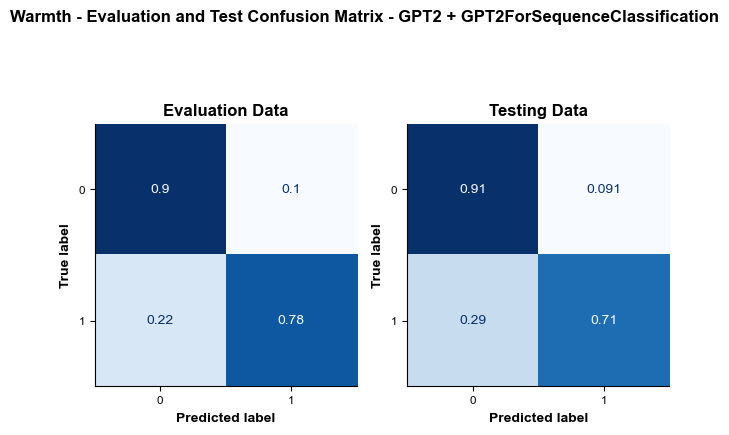

~~~~~~~~~~~~~~~~~~~~
Fitting best params to estimator


/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_55708/193241225.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx], device=device).clone().detach() for key, val in self.encodings.items()}
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Getting prediction results for Warmth.
--------------------
Preprocessing y_pred logits and labels for Warmth:
--------------------
y_pred_logits shape: torch.Size([20, 2]), torch.float32
--------------------
--------------------
Getting y_pred_prob through softmax of y_pred_logits.
Using torch.nn.functional.softmax.
y_pred_prob_array shape: (20, 2), float32


  0%|          | 0/297 [00:00<?, ?it/s]

--------------------
Preprocessing y_pred logits and labels for Warmth:
--------------------
y_pred_logits shape: torch.Size([20, 2]), torch.float32
--------------------
--------------------
Getting y_pred_prob through softmax of y_pred_logits.
Using torch.nn.functional.softmax.
y_pred_prob_array shape: (20, 2), float32
--------------------
Preprocessing y_pred logits and labels for Warmth:
--------------------
y_pred_logits shape: torch.Size([20, 2]), torch.float32
--------------------
--------------------
Getting y_pred_prob through softmax of y_pred_logits.
Using torch.nn.functional.softmax.
y_pred_prob_array shape: (20, 2), float32
--------------------
Preprocessing y_pred logits and labels for Warmth:
--------------------
y_pred_logits shape: torch.Size([20, 2]), torch.float32
--------------------
--------------------
Getting y_pred_prob through softmax of y_pred_logits.
Using torch.nn.functional.softmax.
y_pred_prob_array shape: (20, 2), float32
--------------------
Preprocessing

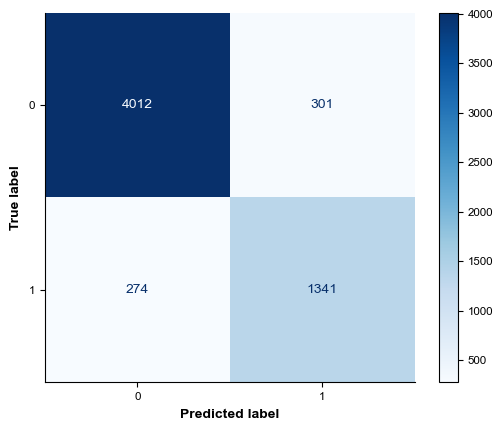

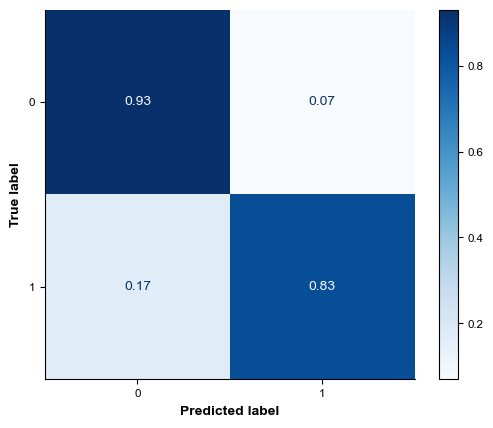

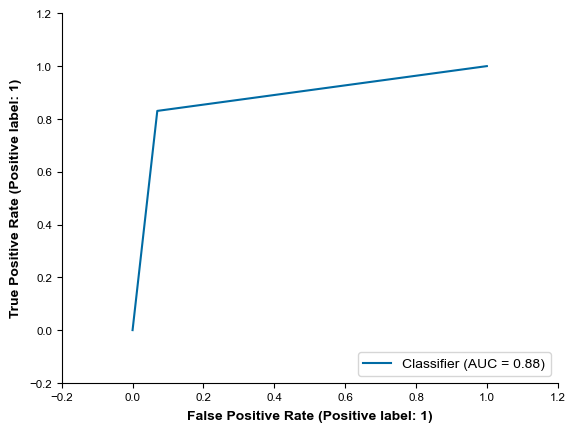

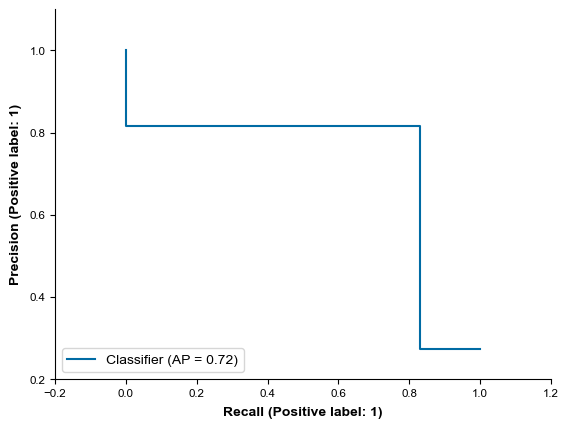

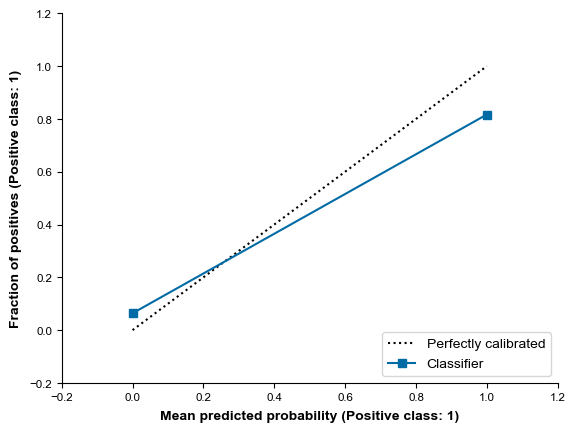

Plotting metrics with y_pred_prob:
Plotting Confusion Matrix:
Saving Confusion Matrix at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Confusion Matrix - GPT2 + GPT2ForSequenceClassification.eps
Saving Confusion Matrix at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Confusion Matrix - GPT2 + GPT2ForSequenceClassification.png
Saving Confusion Matrix at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Confusion Matrix - GPT2 + GPT2ForSequenceClassification.svg


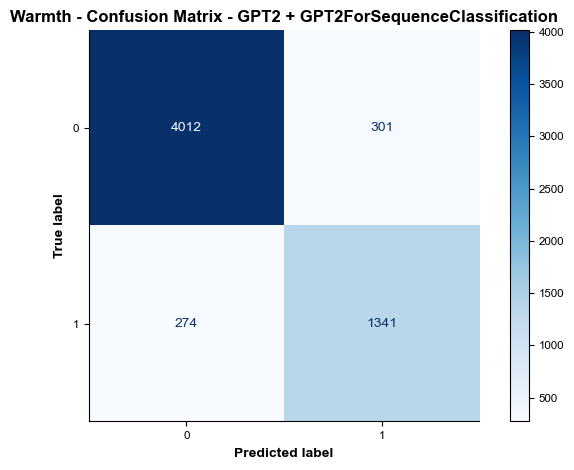

Saved Confusion Matrix!
Plotting Normalized Confusion Matrix:
Saving Normalized Confusion Matrix at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Normalized Confusion Matrix - GPT2 + GPT2ForSequenceClassification.eps
Saving Normalized Confusion Matrix at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Normalized Confusion Matrix - GPT2 + GPT2ForSequenceClassification.png
Saving Normalized Confusion Matrix at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Normalized Confusion Matrix - GPT2 + GPT2ForSequenceClassification.svg


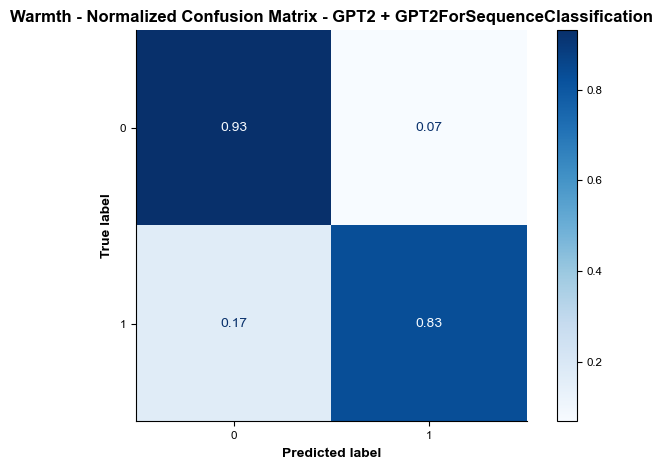

Saved Normalized Confusion Matrix!
Plotting ROC Curve:
Saving ROC Curve at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - ROC Curve - GPT2 + GPT2ForSequenceClassification.eps
Saving ROC Curve at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - ROC Curve - GPT2 + GPT2ForSequenceClassification.png
Saving ROC Curve at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - ROC Curve - GPT2 + GPT2ForSequenceClassification.svg


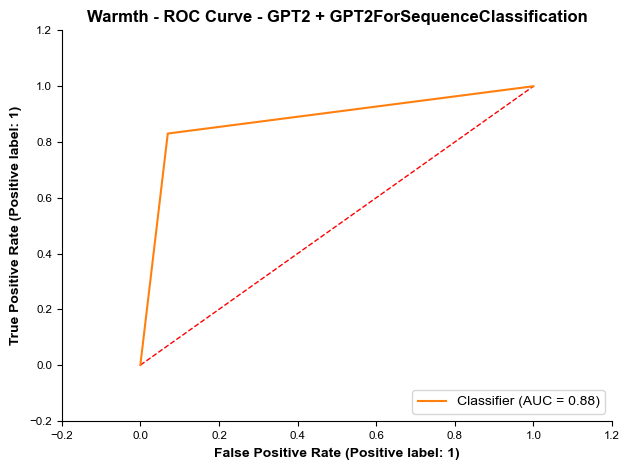

Saved ROC Curve!
Plotting Precision-Recall Curve:
Saving Precision-Recall Curve at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Precision-Recall Curve - GPT2 + GPT2ForSequenceClassification.eps
Saving Precision-Recall Curve at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Precision-Recall Curve - GPT2 + GPT2ForSequenceClassification.png
Saving Precision-Recall Curve at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Precision-Recall Curve - GPT2 + GPT2ForSequenceClassification.svg


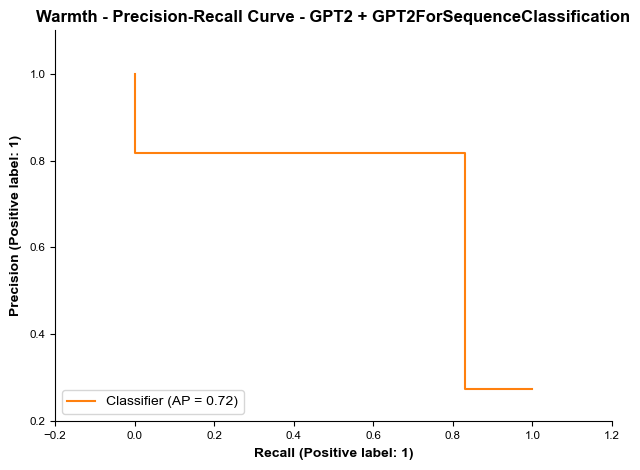

Saved Precision-Recall Curve!
Plotting Calibration Curve:


Saving Calibration Curve at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Calibration Curve - GPT2 + GPT2ForSequenceClassification.eps
Saving Calibration Curve at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Calibration Curve - GPT2 + GPT2ForSequenceClassification.png
Saving Calibration Curve at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Calibration Curve - GPT2 + GPT2ForSequenceClassification.svg


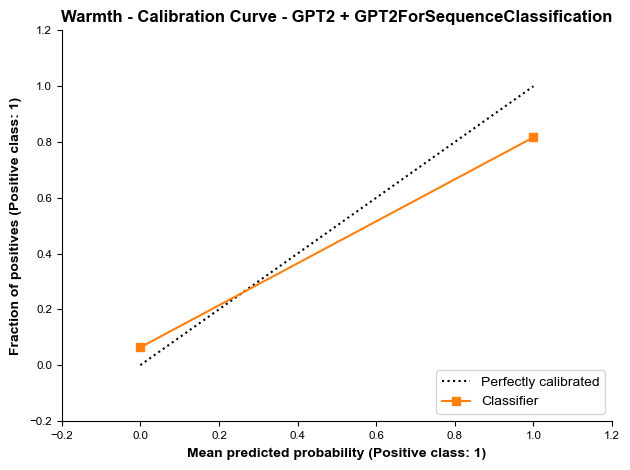

Saved Calibration Curve!
                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4313
           1       0.82      0.83      0.82      1615

    accuracy                           0.90      5928
   macro avg       0.88      0.88      0.88      5928
weighted avg       0.90      0.90      0.90      5928

Saving plot_metric Curves at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - plot_metric Curves - GPT2 + GPT2ForSequenceClassification.eps


Saving plot_metric Curves at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - plot_metric Curves - GPT2 + GPT2ForSequenceClassification.png
Saving plot_metric Curves at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - plot_metric Curves - GPT2 + GPT2ForSequenceClassification.svg


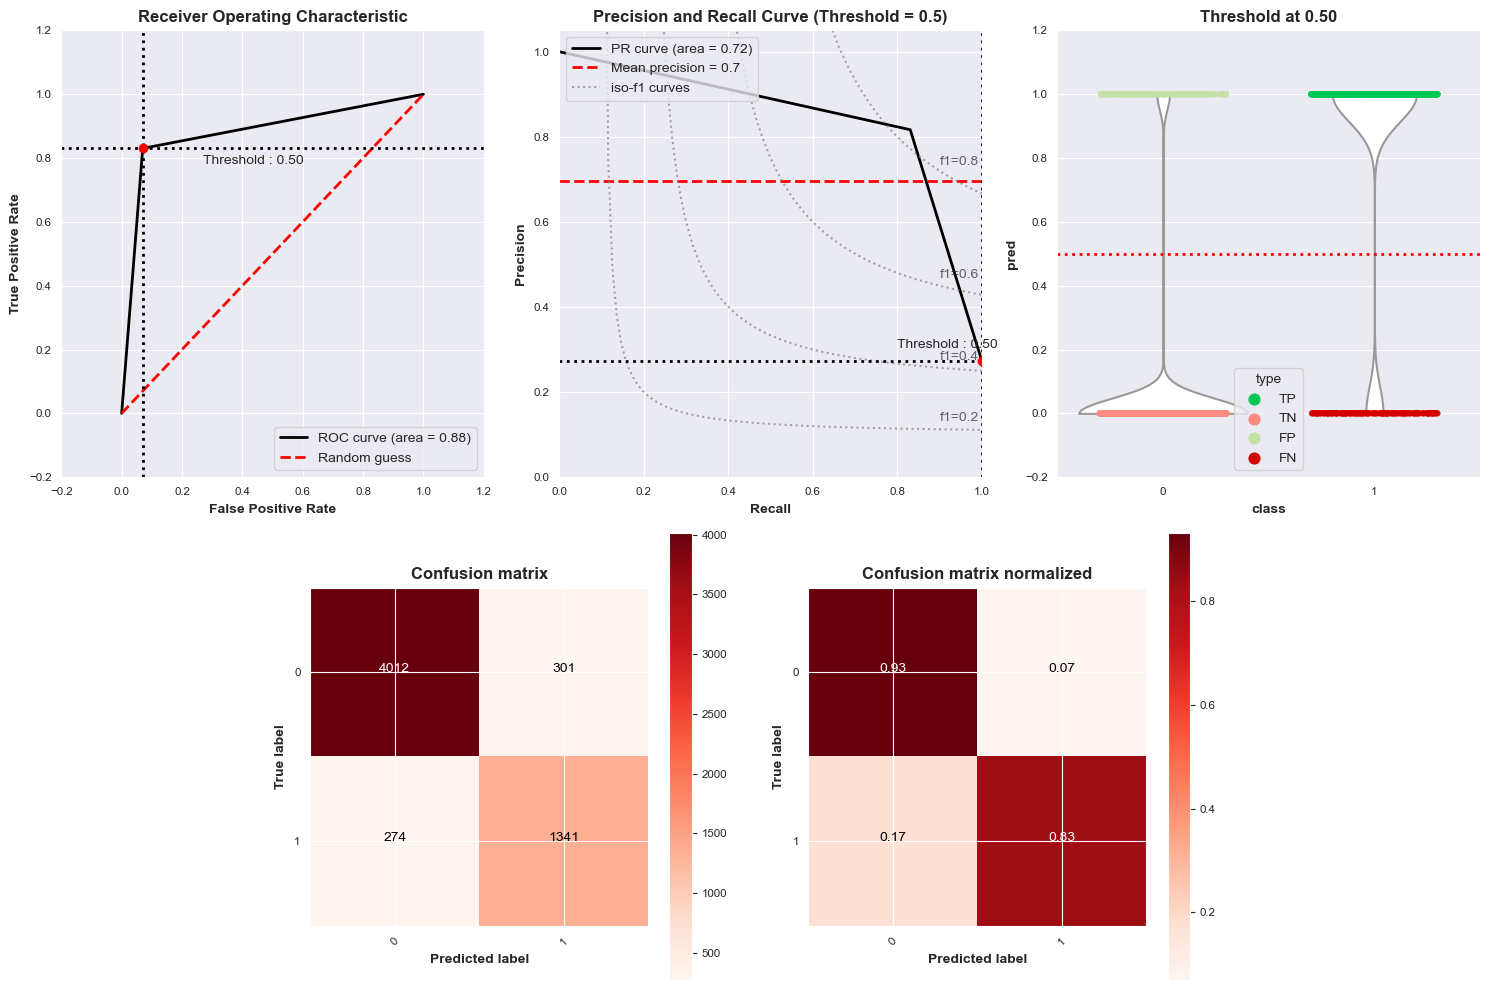

Plotting Heatmap:
Saving Heatmap at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Heatmap - GPT2 + GPT2ForSequenceClassification.eps
Saving Heatmap at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Heatmap - GPT2 + GPT2ForSequenceClassification.png
Saving Heatmap at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Warmth - Heatmap - GPT2 + GPT2ForSequenceClassification.svg
Saved Heatmap!


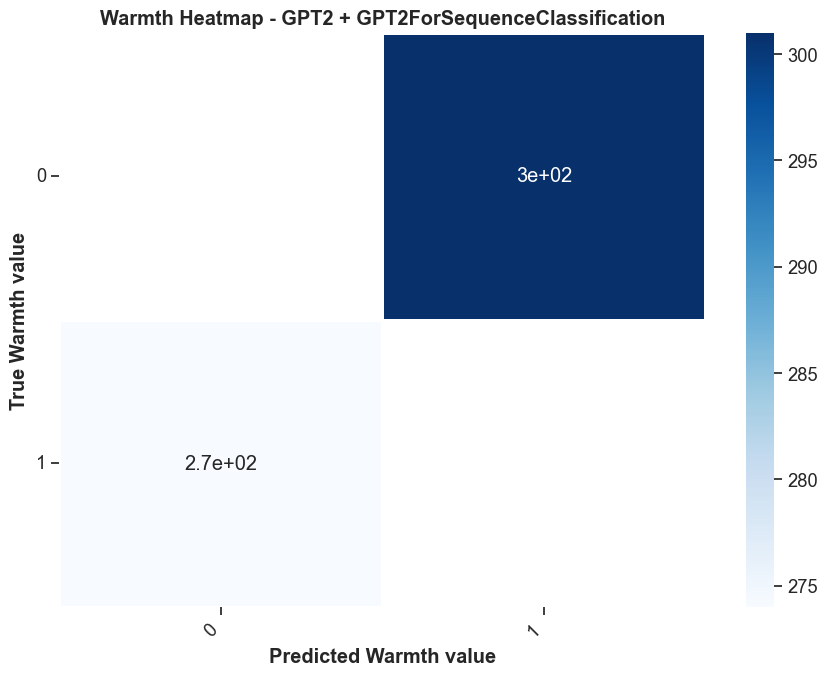

Saving fitted estimator and table at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/output tables/Transformer Estimators Table


 25%|██▌       | 1/4 [11:35<34:46, 695.60s/it]

Done saving fitted estimator and table!
Table does not exist, creating new table...
Done creating new table!
~~~~~~~~~~~~~~~~~~~~
Loading data for Competence - GPT2 + GPT2ForSequenceClassification
~~~~~~~~~~~~~~~~~~~~
Loading Xy from previous for Competence...
Loading eval_metrics_dict from /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/classification models/Transformers Results/Search+Xy/Transformers eval_metrics_dict - Competence - GPT2 + GPT2ForSequenceClassification (Save_protocol=5).pkl
Loading test_metrics_dict from /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/classification models/Transformers Results/Search+Xy/Transformers test_metrics_dict - Competence - GPT2 + GPT2ForSequenceClassification (Save_protocol=5).pkl
Loading df_val_data from /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/classification models/Transformers Results/Search+Xy/Transformers df_val_data - Competence - 

/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_55708/3213751885.py:62: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  metrics_dict[key] = np.fromstring(value[1:-1], sep=' ')


Done loading Xy and estimator!
['eval_metrics_dict', 'test_metrics_dict', 'df_val_data', 'df_test_data', 'df_train_data']
--------------------
============================== EVALUATING DATASET OF LENGTH 5928 ON COMPETENCE ==============================
--------------------
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       330
           1       0.76      0.83      0.80       263

    accuracy                           0.81       593
   macro avg       0.81      0.81      0.81       593
weighted avg       0.81      0.81      0.81       593


~~~~~~~~~~~~~~~~~~~~
Examining predictions for Competence
Incorrectly Classified Reviews:
--------------------
TRUE LABEL: 1
PREDICTED LABEL: 0
REVIEW TEXT: On the day of the event you hand all information over to our Event Operations department.
--------------------
--------------------
TRUE LABEL: 1
PREDICTED LABEL: 0
REVIEW TEXT: Some other main tasks you have a

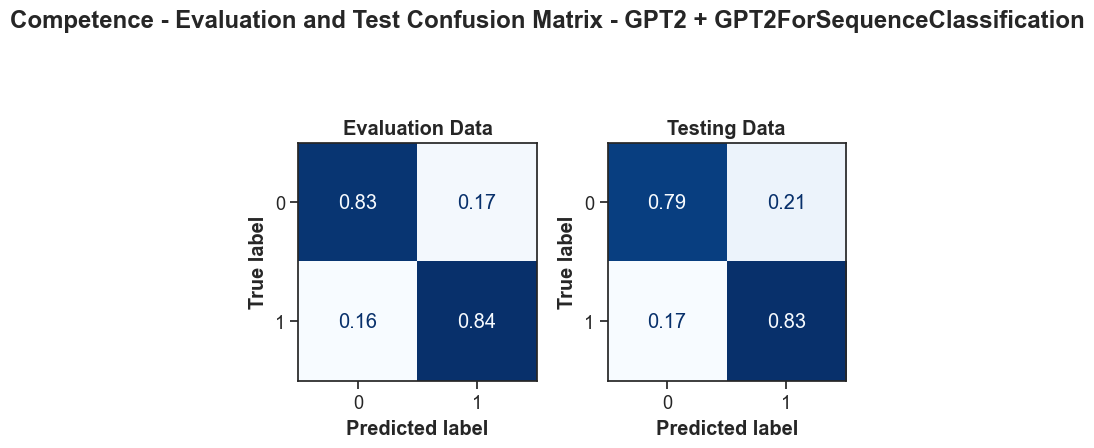

~~~~~~~~~~~~~~~~~~~~
Fitting best params to estimator


/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_55708/193241225.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx], device=device).clone().detach() for key, val in self.encodings.items()}
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Getting prediction results for Competence.
--------------------
Preprocessing y_pred logits and labels for Competence:
--------------------
y_pred_logits shape: torch.Size([20, 2]), torch.float32
--------------------
--------------------
Getting y_pred_prob through softmax of y_pred_logits.
Using torch.nn.functional.softmax.
y_pred_prob_array shape: (20, 2), float32


  0%|          | 0/297 [00:00<?, ?it/s]

--------------------
Preprocessing y_pred logits and labels for Competence:
--------------------
y_pred_logits shape: torch.Size([20, 2]), torch.float32
--------------------
--------------------
Getting y_pred_prob through softmax of y_pred_logits.
Using torch.nn.functional.softmax.
y_pred_prob_array shape: (20, 2), float32
--------------------
Preprocessing y_pred logits and labels for Competence:
--------------------
y_pred_logits shape: torch.Size([20, 2]), torch.float32
--------------------
--------------------
Getting y_pred_prob through softmax of y_pred_logits.
Using torch.nn.functional.softmax.
y_pred_prob_array shape: (20, 2), float32
--------------------
Preprocessing y_pred logits and labels for Competence:
--------------------
y_pred_logits shape: torch.Size([20, 2]), torch.float32
--------------------
--------------------
Getting y_pred_prob through softmax of y_pred_logits.
Using torch.nn.functional.softmax.
y_pred_prob_array shape: (20, 2), float32
--------------------
P

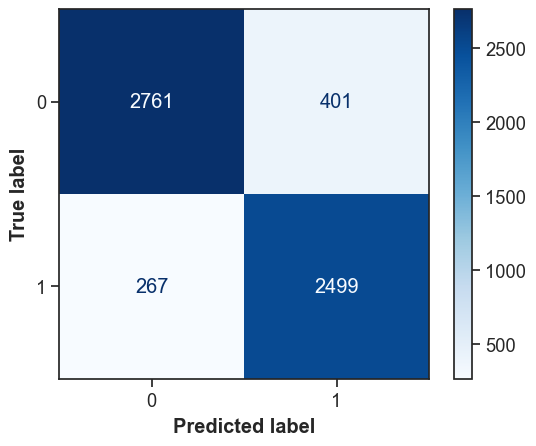

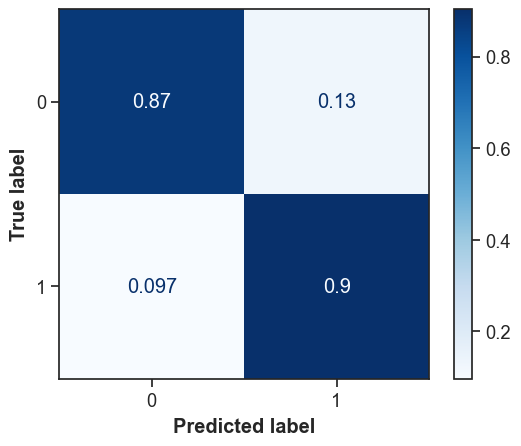

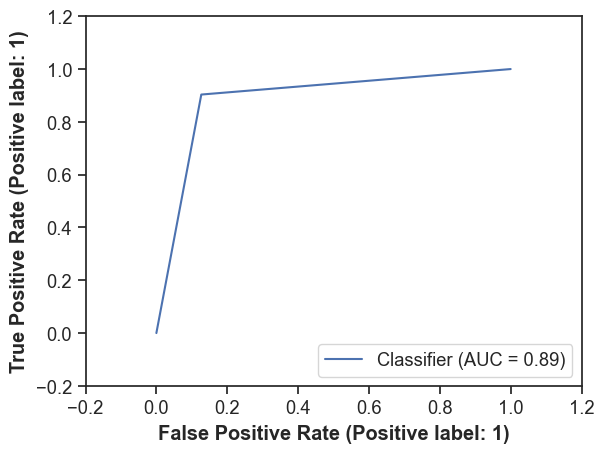

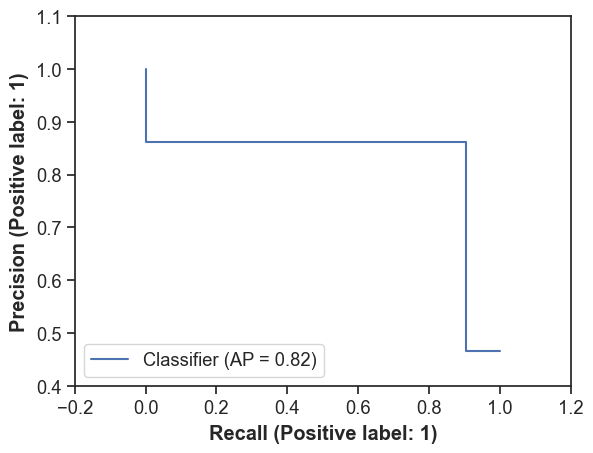

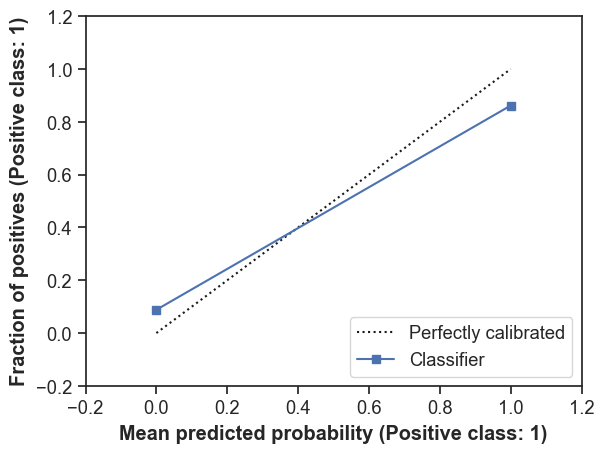

Plotting metrics with y_pred_prob:
Plotting Confusion Matrix:
Saving Confusion Matrix at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Competence - Confusion Matrix - GPT2 + GPT2ForSequenceClassification.eps
Saving Confusion Matrix at /Users/nyxinsane/Documents/Work - UvA/Automating Equity/Study 1/Study1_Code/data/plots/Transformers Competence - Confusion Matrix - GPT2 + GPT2ForSequenceClassification.png


In [32]:
%%time
print('#'*40)
print('Starting!')
print('#'*40)

analysis_columns = ['Warmth', 'Competence']
text_col = 'Job Description spacy_sentencized'

# Get existing estimators
estimator_names_list = get_existing_files()

# Identify cols, vectorizers and classifiers

# Identify cols, vectorizers and classifiers
for estimators_file in tqdm.tqdm(glob.glob(f'{results_save_path}{method} Estimator - *.model')):
    assert f'{method} Estimator - ' in estimators_file, f'Estimators file name {estimators_file} does not contain {method} Estimator - '
    col = estimators_file.split(f'{method} Estimator - ')[-1].split(' - ')[0]
    vectorizer_name = estimators_file.split(f'{col} - ')[-1].split(' + ')[0]
    classifier_name = estimators_file.split(f'{vectorizer_name} + ')[-1].split(' (Save_protocol=')[0]
    model = transformers_pipe[classifier_name]['model']
    tokenizer = transformers_pipe[classifier_name]['tokenizer']
    config = transformers_pipe[classifier_name]['config']
    protocol = int(estimators_file.split(f'{vectorizer_name} + ')[-1].split(' (Save_protocol=')[-1].split(').model')[0])
    output_dir = training_args_dict['output_dir'] = training_args_dict_for_best_trial['output_dir'] = estimators_file
    # Load Table DF
    df_metrics = make_df_metrics(
        vectorizers_pipe=vectorizers_pipe, classifiers_pipe=classifiers_pipe, transformers_pipe=transformers_pipe,
        metrics_list=metrics_dict,
        col=col, vectorizer_name=vectorizer_name, classifier_name=classifier_name, protocol=protocol
    )
    print('~'*20)
    print(f'Loading data for {col} - {vectorizer_name} + {classifier_name}')
    print('~'*20)
    # Load X, y and estimator
    (
        X_train, y_train, train_dataset,
        X_test, y_test, test_dataset, y_test_pred, y_test_pred_prob,
        X_val, y_val, val_dataset, y_val_pred, y_val_pred_prob,
        train_class_weights, train_class_weights_ratio, train_class_weights_dict,
        test_class_weights_dict, test_class_weights_ratio, test_class_weights_dict,
        saved_estimator, tokenizer, config, eval_metrics_dict, test_metrics_dict,
    ) = load_Xy_estimator(
        model, tokenizer, config,
        col, vectorizer_name, classifier_name, protocol,
    )

    print('-'*20)
    print(f'{"="*30} EVALUATING DATASET OF LENGTH {len(X_train)+len(X_test)+len(X_val)} ON {col.upper()} {"="*30}')
    print('-'*20)
    print(
        f'Testing Classification Report:\n{(train_report:=metrics.classification_report(y_test, y_test_pred, labels=np.unique(y_test_pred), zero_division=0))}\n'
    )
    # Examine predictions
    examine_predictions(
        X_test, y_test, y_test_pred, col
    )
    print('='*20)
    # Train and Test Confusion Matrix
    print('='*20)
    print('Evaluation and Test Confusion Matrix:\n')
    close_plots()
    fig, axs = plt.subplots(1, 2)
    fig.suptitle(f'{col} - Evaluation and Test Confusion Matrix - {vectorizer_name} + {classifier_name}')
    for ax in axs:
        ax.set_aspect('equal')
    val_cm = metrics.ConfusionMatrixDisplay.from_predictions(
        y_val, y_val_pred, normalize='true', ax=axs[0], cmap=plt.cm.Blues, colorbar=False
    )
    val_cm.ax_.set_title('Evaluation Data')
    test_cm = metrics.ConfusionMatrixDisplay.from_predictions(
        y_test, y_test_pred, normalize='true', ax=axs[1], cmap=plt.cm.Blues, colorbar=False
    )
    test_cm.ax_.set_title('Testing Data')
    plt.tight_layout()
    for image_save_format in ['eps', 'png', 'svg']:
        save_path = f'{plot_save_path}{method} {col} - Evaluation and Test Confusion Matrix - {vectorizer_name} + {classifier_name}.{image_save_format}'
        try:
            print(f'Evaluation and Test Confusion Matrix plot at {save_path}')
            fig.savefig(
                save_path, format=image_save_format, dpi=3000, bbox_inches='tight'
            )
        except:
            pass
    show_and_close_plots()
    print('='*20)

    # Fit estimator
    print('~'*20)
    print('Fitting best params to estimator')
    X = np.concatenate((X_train, X_test, X_val), axis=0)
    y = np.concatenate((y_train, y_test, y_val), axis=0)
    X_encodings = tokenizer(
        X.tolist(), truncation=True, padding=True, max_length=max_length, return_tensors=returned_tensor
    ).to(device)
    dataset = ToDataset(X_encodings, y)
    # Accelerate model
    (
        saved_estimator, tokenizer, dataset
    ) = accelerator.prepare(
        saved_estimator, tokenizer, dataset
    )
    # model.eval()

    # Get predictions
    print(f'Getting prediction results for {col}.')
    estimator = Trainer(
        model=saved_estimator,
        args=TrainingArguments(**training_args_dict),
        tokenizer=tokenizer,
        preprocess_logits_for_metrics=preprocess_logits_for_metrics_y_pred_prob,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
        # data_collator=transformers.DataCollatorWithPadding(tokenizer),
    )
    optimizer = torch.optim.AdamW(
        estimator.model.parameters(),
        lr=3e-5,
    )
    y_pred_logits, y_labels, metrics_dict = estimator.predict(dataset)
    y_pred = metrics_dict.pop('test_y_pred')
    y_pred_prob = metrics_dict.pop('test_y_pred_prob')
    metrics_dict = clean_metrics_dict(metrics_dict, list(metrics_dict.keys())[0].split('_')[0])
    save_fitted_estimator(estimator, metrics_dict, col, vectorizer_name, classifier_name, protocol)
    print('Done predicting!')

    # Evaluate Model
    df_metrics = evaluation(
        y_labels, y_pred,
        metrics_dict, df_metrics,
        col, vectorizer_name, classifier_name
    )

    # Save Vectorizer, Selector, and Classifier
    save_table(df_metrics, col, vectorizer_name, classifier_name, protocol)
